# An optimization using Nelder-Mead method (Simplex)

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Defining functions

### Rosenbrock function

In [2]:
def rosenbrock_function(x,y):
    '''
    Calculate the rosenbrock map.   
    
    '''
    p1 = x
    p2 = y
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

In [3]:
def rosenbrock(p):
    '''
    Calculate the rosenbrock function.   
    
    '''
    p1 = p[0]
    p2 = p[1]
    z = 100.*(p2-p1**2)**2 + (1.- p1)**2
    return z

## Parameters for calculating the rosenbrock function 

In [4]:
Nx = 20
Ny = 20

In [5]:
x = np.linspace(-5.,5.,num=Nx)
y = np.linspace(-10.,10.,num=Ny)
X,Y = np.meshgrid(x,y)

In [6]:
Z = rosenbrock_function(X,Y) 

In [7]:
Z_ros = histeq(Z).reshape(Nx,Ny)

## Visuatization of the Rosenbrock function 


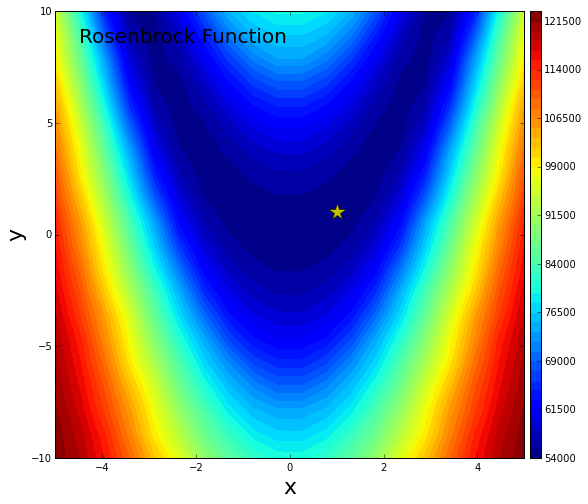

In [8]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.plot(1., 1., '*y',markersize=18)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()


## Calculating the Simplex method for Rosenbrock function

### Parameters for the algorithm

In [9]:
itmax = 70

# initial approximation 
p0 = np.array([-4.8,-9.,-4.,-5.,-3.,-6.]).reshape(3,2)
phi01 = rosenbrock(p0[0])
phi02 = rosenbrock(p0[1])
phi03 = rosenbrock(p0[2])   
phi0 = np.array([phi01, phi02, phi03])


i_L = np.argmin(p0)
px = [p0[i_L][0]]
py = [p0[i_L][1]]

# List of phi
phi_it = [phi0[i_L]]

# Algorithm parameters

alpha = 1. # reflexion parameter
gamma = 1.2 # expansion parameter
beta = 0.2 # contraction parameter

### Nelder-Mead Algorithm

In [10]:
for i in range(itmax):
    # step 3 : maximum and minimun value
    phi1 = rosenbrock(p0[0])
    phi2 = rosenbrock(p0[1])
    phi3 = rosenbrock(p0[2])   
    phi0 = np.array([phi1, phi2, phi3])

    i_L = np.argmin(phi0)
    i_H = np.argmax(phi0)
    
    p_L = p0[i_L]
    phi_L = rosenbrock(p_L)
    
    p_H = p0[i_H]
    phi_H = rosenbrock(p_H)
    
    p_i = np.delete(p0,[i_H,i_L],0).reshape(2,)
    phi_i = rosenbrock(p_i)
    
    p_del = np.delete(p0,i_H,0)
    phi_del = np.delete(phi0,i_H,0)
    
    # step 4 : centroid calculation
    p_c = 0.5*(p_L + p_i)
        
    # step 5 : reflection
    delta = (p_c - p_H)
    p_R = p_c + alpha*delta
        
    # step 6 : Calculation of the phi for Reflection
    phi_R = rosenbrock(p_R)
        
    ## step 6a :
    if phi_R < phi_L:
        p_E = p_c + gamma*(p_R - p_c)
        phi_E = rosenbrock(p_E)
        ### case 1
        if phi_E <= phi_L:
            p_H = p_E
            p = np.vstack((p_del,p_E))
            phi = np.hstack((phi_del,phi_E))
        ### case 2
        elif phi_E > phi_L:
            p = np.vstack((p_del,p_R))
            phi = np.hstack((phi_del,phi_R))
    
    ## step 6b :
    if phi_R >= phi_L and phi_R < phi_i:
        p = np.vstack((p_del,p_R))
        phi = np.hstack((phi_del,phi_R))
    
    ## step 6c:
    if phi_R > phi_del[0] and phi_R > phi_del[1] :
        ### case 1
        if phi_R < phi_H:
            p_contrac = p_c + beta*(p_R - p_c)
            phi_contrac = rosenbrock(p_contrac)
            #### case 1a
            if phi_contrac < phi_R:
                p = np.vstack((p_del,p_contrac))
                phi = np.hstack((phi_del,phi_contrac))
            #### casa 1b
            elif phi_contrac >= phi_R:
                p_H = 0.5*(p_H + p_L)
                p_i = 0.5*(p_i + p_L)
                phi_H = rosenbrock(p_H)
                phi_i = rosenbrock(p_i)
                p = np.vstack((p_L, p_H,p_i))
                phi = np.hstack((phi_L, phi_H,phi_i))
        
        ### case 2
        if phi_R >= phi_H:
            p_contrac = p_c + beta*(p_H - p_c)
            phi_contrac = rosenbrock(p_contrac)
            #### case 2a
            if phi_contrac < phi_H:
                p = np.vstack((p_del,p_contrac))
                phi = np.hstack((phi_del,phi_contrac))
            #### case 2b
            elif phi_contrac >= phi_H:
                p_H = 0.5*(p_H + p_L)
                p_i = 0.5*(p_i + p_L)
                phi_H = rosenbrock(p_H)
                phi_i = rosenbrock(p_i)
                p = np.vstack((p_L, p_H,p_i))
                phi = np.hstack((phi_L, phi_H,phi_i))
    
    
    px.append(p0[i_L][0])
    py.append(p0[i_L][1])
    phi_it.append(phi_L)
    
    if abs(np.sum(phi - phi0)/phi0.size) <= 1e-8:
        break
    else:
        p0 = p
        phi0 = phi

In [11]:
print p0[i_L]

[ 1.00144487  1.00336288]


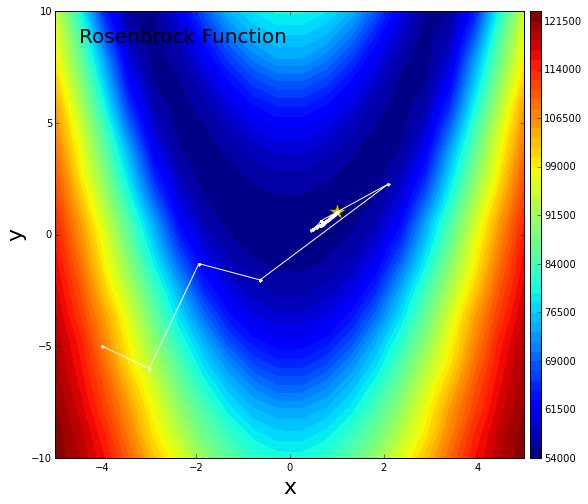

In [12]:
title_font = 22
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z_ros, 50)
plt.plot(1., 1., '*y',markersize=18)
plt.plot(px,py,'w.-')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
plt.xlabel('x', fontsize = title_font)
plt.ylabel('y', fontsize = title_font)
plt.annotate('Rosenbrock Function', xy = (0.05, 0.93), xycoords = 'axes fraction', fontsize=20)

plt.show()

## Analysis of convergence

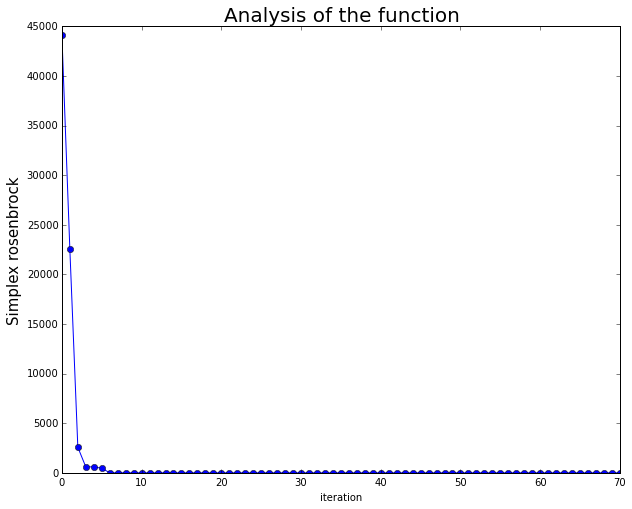

In [13]:
plt.figure(figsize=(10,8))

plt.plot(phi_it, '-o')
plt.title('Analysis of the function',fontsize=20)
plt.ylabel('Simplex rosenbrock',fontsize=15)
plt.xlabel('iteration',)

plt.show()
